In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('countries of the world.csv', encoding = "ISO-8859-1")

In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
data = data.replace({',': '.'}, regex=True)

In [5]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.2,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0,0,100,2,14.17,5.34,0.04,0.18,0.78
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2,16.93,5.37,0.038,0.22,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.3,80.15,4,12.07,8.23,0.239,0.343,0.418


In [6]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [7]:
data.rename(columns = {'Area (sq. mi.)': 'Area','Pop. Density (per sq. mi.)': 'PopDensity', 
                      'Coastline (coast/area ratio)':'Coastline','Net migration':'Migrated',
                        'Infant mortality (per 1000 births)':'InfMortality','GDP ($ per capita)':'GDP',
                          'Literacy (%)':'Literacy','Phones (per 1000)':'Phones','Arable (%)':'Arable',
                           'Crops (%)':'Crops','Other (%)':'Other'}, inplace=True)

In [8]:
data['PopDensity'] = pd.to_numeric(data['PopDensity'], downcast = 'float')
data['Coastline'] = pd.to_numeric(data['Coastline'], downcast = 'float')
data['Migrated'] = pd.to_numeric(data['Migrated'], downcast = 'float')
data['InfMortality'] = pd.to_numeric(data['InfMortality'], downcast = 'float')
data['GDP'] = pd.to_numeric(data['GDP'], downcast = 'float')
data['Literacy'] = pd.to_numeric(data['Literacy'], downcast = 'float')
data['Phones'] = pd.to_numeric(data['Phones'], downcast = 'float')
data['Arable'] = pd.to_numeric(data['Arable'], downcast = 'float')
data['Crops'] = pd.to_numeric(data['Crops'], downcast = 'float')
data['Other'] = pd.to_numeric(data['Other'], downcast = 'float')
data['Climate'] = pd.to_numeric(data['Climate'], downcast = 'float')
data['Birthrate'] = pd.to_numeric(data['Birthrate'], downcast = 'float')
data['Deathrate'] = pd.to_numeric(data['Deathrate'], downcast = 'float')
data['Agriculture'] = pd.to_numeric(data['Agriculture'], downcast = 'float')
data['Industry'] = pd.to_numeric(data['Industry'], downcast = 'float')
data['Service'] = pd.to_numeric(data['Service'], downcast = 'float')

In [9]:
data.dtypes

Country          object
Region           object
Population        int64
Area              int64
PopDensity      float32
Coastline       float32
Migrated        float32
InfMortality    float32
GDP             float32
Literacy        float32
Phones          float32
Arable          float32
Crops           float32
Other           float32
Climate         float32
Birthrate       float32
Deathrate       float32
Agriculture     float32
Industry        float32
Service         float32
dtype: object

In [10]:
data.isnull().sum()

Country          0
Region           0
Population       0
Area             0
PopDensity       0
Coastline        0
Migrated         3
InfMortality     3
GDP              1
Literacy        18
Phones           4
Arable           2
Crops            2
Other            2
Climate         22
Birthrate        3
Deathrate        4
Agriculture     15
Industry        16
Service         15
dtype: int64

In [11]:
data.dropna(subset=['GDP'], inplace=True)
data.dropna(subset=['Literacy'], inplace=True)
data.dropna(subset=['Phones'], inplace=True)
data.dropna(subset=['Climate'], inplace=True)
data.dropna(subset=['Birthrate'], inplace=True)
data.dropna(subset=['Deathrate'], inplace=True)
data.dropna(subset=['Agriculture'], inplace=True)
data.dropna(subset=['Industry'], inplace=True)
data.dropna(subset=['Service'], inplace=True)

In [12]:
data.describe()

,Population,Area,PopDensity,Coastline,Migrated,InfMortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805023,16.495195,-0.206536,38.898155,9125.698242,81.944138,208.151978,14.000446,4.440838,81.558212,2.108938,23.067486,9.465139,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352539,73.977600,4.751216,35.353004,9644.123047,19.837536,210.121872,13.152405,8.090331,16.103748,0.697611,11.287208,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330002,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950001,27.099999,3.675000,0.230000,72.825001,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900002,0.630000,0.000000,24.309999,5100.000000,90.900002,137.100006,10.530000,1.030000,86.070000,2.000000,20.459999,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.699997,5.355000,0.395000,64.605000,12950.000000,97.800003,335.000000,20.000000,4.600000,94.809998,2.500000,32.315001,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.659973,23.059999,163.070007,37800.000000,100.000000,898.000000,62.110001,48.959999,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [13]:
data.corr()

,Population,Area,PopDensity,Coastline,Migrated,InfMortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.610850,-0.019010,-0.054617,0.010332,0.002438,-0.033618,-0.038162,-0.003942,0.206667,-0.062567,-0.137345,-0.018471,-0.064719,-0.050578,-0.007401,0.092468,-0.070320
Area,0.610850,1.000000,-0.069010,-0.088162,0.052730,0.002924,0.068356,0.000682,0.077864,-0.053747,-0.160433,0.124528,-0.094852,-0.037473,-0.024266,-0.017035,0.103225,-0.070204
PopDensity,-0.019010,-0.069010,1.000000,0.164036,0.161705,-0.143214,0.190122,0.086090,0.157072,-0.059223,-0.036580,0.066753,-0.012370,-0.174565,-0.130624,-0.144315,-0.145370,0.255477
Coastline,-0.054617,-0.088162,0.164036,1.000000,-0.241629,-0.105956,0.035815,0.099605,0.098367,-0.077800,0.399358,-0.137085,-0.027063,-0.063464,-0.148592,-0.032327,-0.188972,0.190004
Migrated,0.010332,0.052730,0.161705,-0.241629,1.000000,0.013053,0.378790,-0.053788,0.232446,-0.065846,-0.405355,0.257420,-0.070413,-0.035102,0.042805,-0.096618,-0.004402,0.091498
InfMortality,0.002438,0.002924,-0.143214,-0.105956,0.013053,1.000000,-0.639090,-0.761224,-0.699199,-0.123033,-0.095712,0.148600,-0.366672,0.862113,0.665729,0.758537,-0.085310,-0.618259
GDP,-0.033618,0.068356,0.190122,0.035815,0.378790,-0.639090,1.000000,0.522880,0.883520,0.046465,-0.207844,0.066445,0.360567,-0.658795,-0.247562,-0.616919,0.032855,0.536551
Literacy,-0.038162,0.000682,0.086090,0.099605,-0.053788,-0.761224,0.522880,1.000000,0.592042,0.086519,0.060741,-0.101167,0.395194,-0.788349,-0.401696,-0.620514,0.105703,0.474395
Phones,-0.003942,0.077864,0.157072,0.098367,0.232446,-0.699199,0.883520,0.592042,1.000000,0.124116,-0.124819,-0.038643,0.410691,-0.732985,-0.317530,-0.631578,-0.084247,0.649638
Arable,0.206667,-0.053747,-0.059223,-0.077800,-0.065846,-0.123033,0.046465,0.086519,0.124116,1.000000,0.098265,-0.866058,0.392914,-0.198438,0.047771,-0.018610,-0.073380,0.081982


In [14]:
X= data[['Literacy','Phones','Agriculture','Industry','Service']]

In [15]:
data['GDPCat'] = np.where(data.GDP < 10000, 0,1)

In [16]:
data.head()

,Country,Region,Population,Area,PopDensity,Coastline,Migrated,InfMortality,GDP,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDPCat
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.000000,0.000000,23.059999,163.070007,700.0,36.0,...,12.13,0.22,87.650002,1.0,46.599998,20.34,0.380,0.240,0.380,0
1,Albania,EASTERN EUROPE,3581655,28748,124.599998,1.260000,-4.930000,21.520000,4500.0,86.5,...,21.09,4.42,74.489998,3.0,15.110000,5.22,0.232,0.188,0.579,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.800000,0.040000,-0.390000,31.000000,6000.0,70.0,...,3.22,0.25,96.529999,1.0,17.139999,4.61,0.101,0.600,0.298,0
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.100006,59.799999,10.760000,21.030001,8600.0,95.0,...,0.00,0.00,100.000000,2.0,14.170000,5.34,0.040,0.180,0.780,0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.000000,34.540001,-6.150000,19.459999,11000.0,89.0,...,18.18,4.55,77.269997,2.0,16.930000,5.37,0.038,0.220,0.743,1


In [17]:
Y = data.GDPCat

## Decision Tree Model

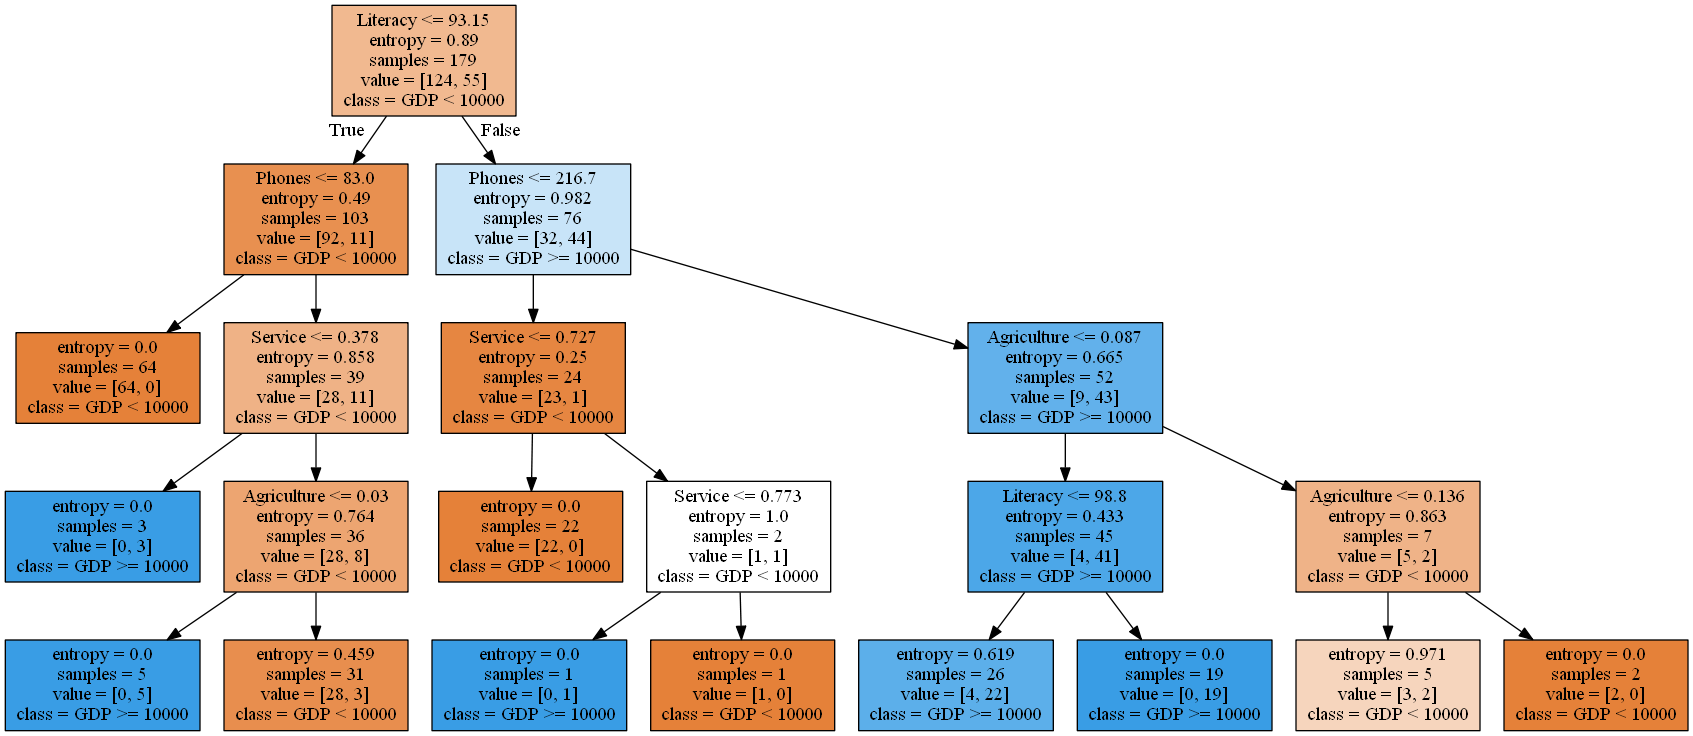

In [18]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['GDP < 10000', 'GDP >= 10000'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree, X, Y, cv=10).mean()

0.8533195734434124

In [21]:
import time
start_time = time.time()
decision_tree.fit(X, Y)
cross_val_score(decision_tree, X, Y, cv=10).mean()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.05201363563537598 seconds ---


## Random Forest Model

In [23]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_jobs= -1)
X = data.drop('GDPCat', 1)
Y = data['GDPCat']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = X[['Literacy','Phones','Agriculture','Industry','Service']]
cross_val_score(rfc, X, Y, cv=10).mean()

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

0.8876332989336084

In [24]:

start_time = time.time()
cross_val_score(rfc, X, Y, cv=10).mean()
print("--- %s seconds ---" % (time.time() - start_time))

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

--- 0.22203612327575684 seconds ---


## Conclusion

In this case though the Random Forest Model took more time than the Decision tree model, I would till prefer it due to accuracy of 89% vs 85% of Decision Trees.